In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


In [2]:
## Load Data

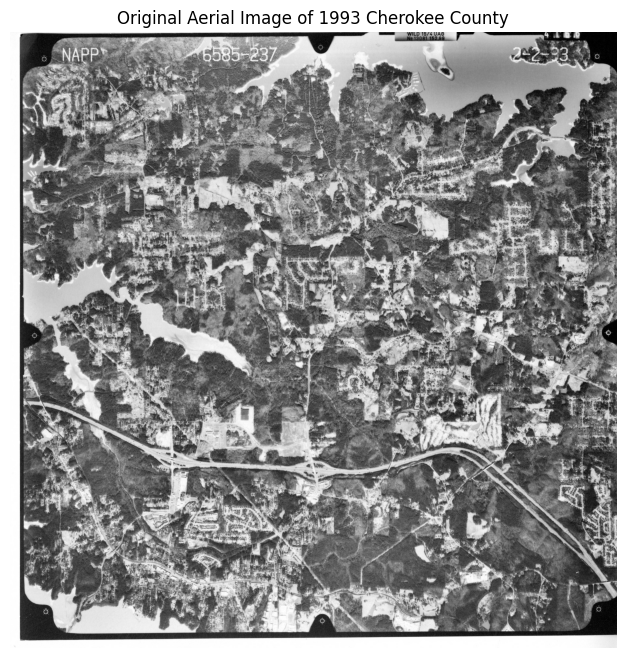

In [3]:
# Loads my chosen aerial image
image_path = "Cherokee_1993.jpg"
img = cv2.imread(image_path)

# convert to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.title("Original Aerial Image of 1993 Cherokee County")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [4]:
## Preprocessing

In [ ]:
##### Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the full grayscale image for comparison
plt.figure(figsize=(8, 8))
plt.title("Full Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

# Get the dimensions of the full grayscale image
height, width = gray.shape

y_start = int(height / 4)
y_end = int(height * 3 / 4)
x_start = int(width / 4)
x_end = int(width * 3 / 4)

roi = gray[y_start:y_end, x_start:x_end]

blurred_roi = cv2.GaussianBlur(roi, (7, 7), 0)

plt.figure(figsize=(8, 8))
plt.title("Final Cropped and Blurred ROI")
plt.imshow(blurred_roi, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
## Baseline Forest Classification

In [ ]:
# Method 1: Thresholding 
# Simple global thresholding (should tweak values)
_, thresh = cv2.threshold(blurred_roi, 120, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(8, 8))
plt.title("Thresholding Result (Forest vs Non-Forest):")
plt.imshow(thresh, cmap="gray")
plt.axis("off")
plt.show()


# Method 2: Clustering (K-Means on pixel intensity)
pixels = blurred_roi.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 10).fit(pixels)


if kmeans.cluster_centers_[0] < kmeans.cluster_centers_[1]:
    forest_cluster = 0
else:
    forest_cluster = 1
kmeans_labels = (kmeans.labels_ == forest_cluster).astype(np.uint8)
kmeans_map = kmeans_labels.reshape(blurred_roi.shape)

plt.figure(figsize=(8, 8))
plt.title("K-Means Classification (2 Clusters) Result:")
plt.imshow(kmeans_map, cmap="gray")
plt.axis("off")
plt.show()


In [ ]:
## Machine Learning Classifer: Random Forest Model

In [ ]:
forest_samples = np.array([45, 58, 65, 72, 80, 95]).reshape(-1, 1) # Dark, textured areas
non_forest_samples = np.array([210, 195, 180, 165, 150, 140]).reshape(-1, 1) # Bright roofs, gray roads, open fields

x_train = np.vstack([forest_samples, non_forest_samples])
y_train = np.hstack([np.ones(len(forest_samples)), np.zeros(len(non_forest_samples))])

clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
clf.fit(x_train, y_train)

all_pixels = blurred_roi.reshape(-1, 1)
final_map = clf.predict(all_pixels)
final_image = final_map.reshape(blurred_roi.shape)

plt.figure(figsize=(8, 8))
plt.title("Final Machine Learning Classification Map")
plt.imshow(final_image, cmap="gray")
plt.axis("off")
plt.show()


